In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
matplotlib.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv("all_data_modeling.csv", index_col=0)
print(df.shape)
df.head(2)

(178, 39)


,zipcode,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,...,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,10001,-0.000007,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,...,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286,12.446914,0.533825,0.117905,0.050109,0.037876
1,10002,0.000002,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,...,-0.034884,0.027568,-0.040357,0.006078,2.194057,10.818387,0.473819,0.128549,0.055533,0.048182


In [3]:
X = df.iloc[:,1:-5]
X.head(2)

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,...,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-0.000007,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,0.086226,...,12.344520,2.416417,2.613102,-3.175060,446.31,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286
1,0.000002,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,0.365812,...,34.474717,-1.217650,1.921604,-1.407908,635.54,-0.034884,0.027568,-0.040357,0.006078,2.194057


In [4]:
Ygroup = df.iloc[:,-5:]
Ygroup.head(2)

,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,12.446914,0.533825,0.117905,0.050109,0.037876
1,10.818387,0.473819,0.128549,0.055533,0.048182


In [5]:
X['drug_change_area'] = X['drug_change_area'].apply(lambda x: x*1000000)
X['larceny_change_area'] = X['larceny_change_area'].apply(lambda x: x*1000000)
X['robbery_change_area'] = X['robbery_change_area'].apply(lambda x: x*10000000)
X['drug_change_pop'] = X['drug_change_pop'].apply(lambda x: x*1000)
X['larceny_change_pop'] = X['larceny_change_pop'].apply(lambda x: x*1000)
X['robbery_change_pop'] = X['robbery_change_pop'].apply(lambda x: x*1000)
X['drug_change_rate'] = X['drug_change_rate'].apply(lambda x: x*10)
X['petit_larceny_change_rate'] = X['petit_larceny_change_rate'].apply(lambda x: x*10)
X['robbery_change_rate'] = X['robbery_change_rate'].apply(lambda x: x*10)

X['MasterCard_growth_rank'] = X['MasterCard_growth_rank'].apply(lambda x: x*0.01)
X['pv_change_area'] = X['pv_change_area'].apply(lambda x: x*100)
X['sub_change_area'] = X['sub_change_area'].apply(lambda x: x*100)
X['taxi_change_area'] = X['taxi_change_area'].apply(lambda x: x*100)
X['fhv_change_area'] = X['fhv_change_area'].apply(lambda x: x*1000)
X.describe()

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,...,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,-1.042264,-0.388927,-7.457633,-0.541711,-0.209339,-0.496294,0.924234,0.600594,-1.762649,0.385948,...,10.225349,4.809140,1.800135,0.588583,4.997019,0.873368,-2.505768,-2.336018,23.783076,1.902311
std,4.133825,8.882932,11.958717,2.098462,6.170982,0.655692,9.062719,3.870014,3.279686,0.505474,...,13.329170,5.594262,2.114729,3.219347,1.010691,11.890605,59.495296,5.861907,72.794552,1.321881
min,-32.540234,-77.156761,-58.088128,-9.647430,-61.259091,-2.798906,-9.534884,-6.666667,-7.000000,-0.532790,...,-1.168449,-3.284614,-2.436173,-13.295176,2.461900,-32.527153,-308.054323,-31.493859,-0.070245,-3.370721
25%,-0.990935,-0.822399,-10.635474,-0.914883,-0.980886,-0.968831,-4.296898,-1.192661,-3.587032,0.157630,...,1.756075,0.810935,0.421192,0.255239,4.280525,0.205568,-1.428867,-0.550184,2.960521,1.342697
50%,-0.068867,0.055119,-4.508846,-0.115584,0.050399,-0.360560,-1.039889,0.069135,-2.158385,0.331825,...,4.688480,2.784474,1.273291,1.059712,4.972250,0.798367,0.000000,-0.039162,8.040228,2.064317
75%,0.196929,1.801461,-0.445774,0.168094,1.291962,-0.061180,2.032732,1.503207,-0.658561,0.525532,...,14.590140,8.387394,2.429200,1.951209,5.584025,2.308816,0.301049,0.000493,20.060587,2.586293
max,9.014953,21.778279,16.673818,11.431184,32.464563,2.743484,50.000000,26.666667,20.000000,5.330000,...,80.637093,26.889633,11.176714,10.981128,8.035700,97.693239,584.871806,1.156124,666.422919,5.566804


In [6]:
def cross_validate(clf, param_grid):
    from sklearn.model_selection import GridSearchCV
    
    clf_=GridSearchCV(clf,param_grid=param_grid,verbose=1)
    rs=clf_.fit(X_train,y_train)
    return rs.best_params_

renovation_index_with_rent
Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    2.0s finished


{'max_depth': 3, 'min_samples_leaf': 2}
In sample accuracy: 0.5757173031174208
Out of sample accuracy: 0.14727922342818234


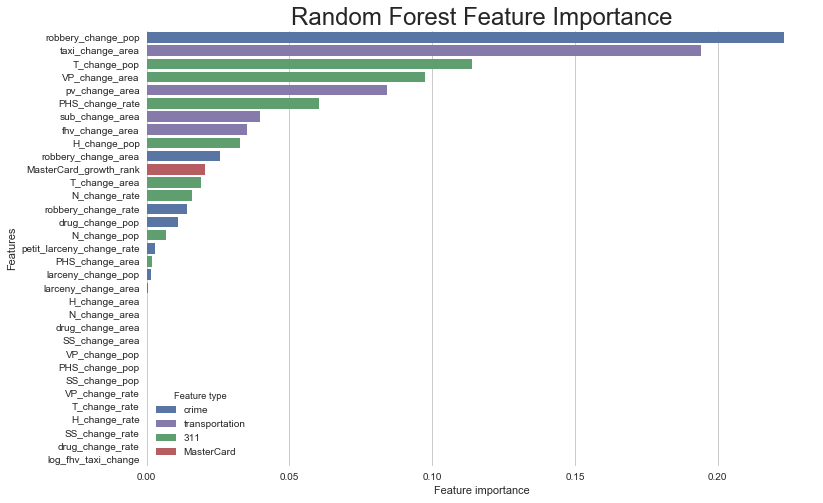

business_renewal
Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    2.3s finished


{'max_depth': 5, 'min_samples_leaf': 3}
In sample accuracy: 0.8008108451213305
Out of sample accuracy: 0.5032470576660277


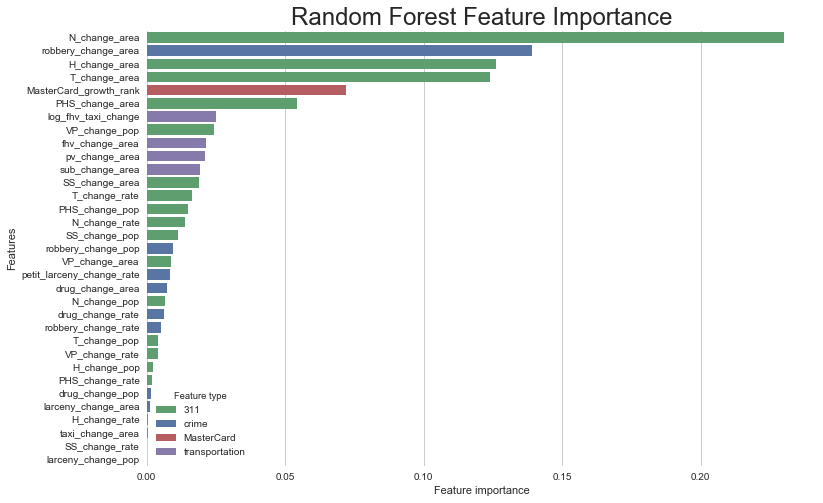

rent_increase
Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    2.0s finished


{'max_depth': 1, 'min_samples_leaf': 1}
In sample accuracy: 0.14671871116350843
Out of sample accuracy: 0.15263406379851985


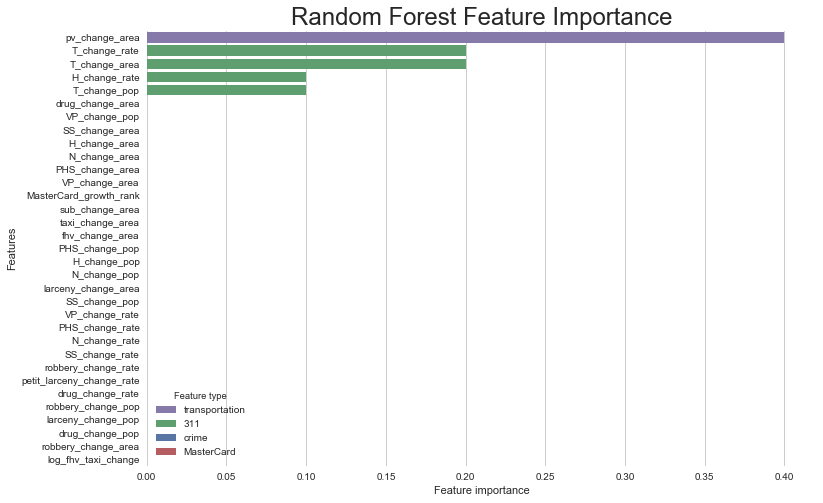

new_building_tbp
Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    2.2s finished


{'max_depth': 3, 'min_samples_leaf': 2}
In sample accuracy: 0.6695914013438287
Out of sample accuracy: 0.18636823684358697


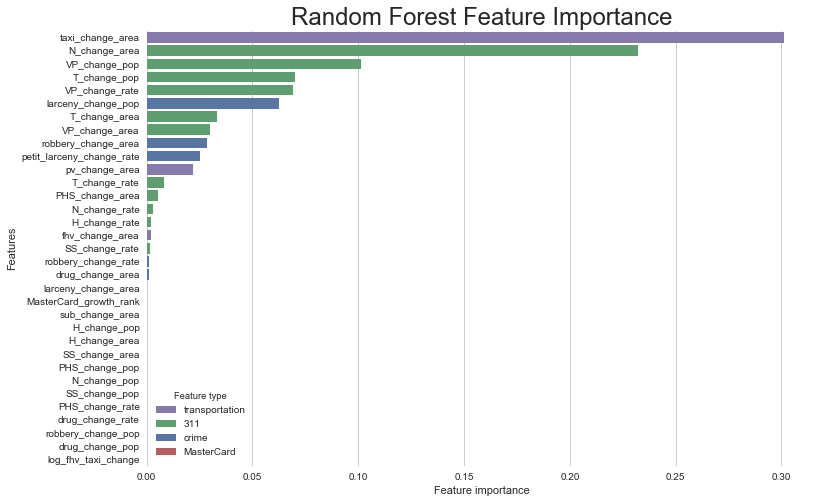

major_renovation_tbp
Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    2.3s finished


{'max_depth': 4, 'min_samples_leaf': 3}
In sample accuracy: 0.7767085083281825
Out of sample accuracy: 0.1988027166676717


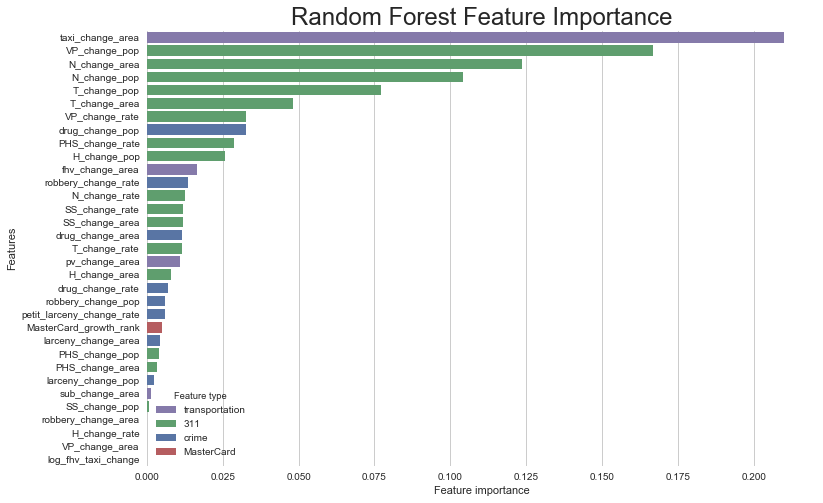

In [23]:
for i in range(5):
    print(Ygroup.columns[i])
    X_train, X_test, y_train, y_test = train_test_split(
        X, Ygroup.iloc[:,i], test_size = 0.3, random_state = 0)
    
    est=RandomForestRegressor(random_state = 888)
    est.fit(X_train,y_train)
    
    param_grid = {'max_depth':range(1,12), 'min_samples_leaf':range(1,5)}
    best_param = cross_validate(est, param_grid)
    print(best_param)
    
    est=RandomForestRegressor(random_state = 888, 
                              max_depth = best_param['max_depth'], 
                              min_samples_leaf = best_param['min_samples_leaf'])
    est.fit(X_train,y_train)
    
    
    print ('In sample accuracy: {}'.format(est.score(X_train,y_train)))
    print ('Out of sample accuracy: {}'.format(est.score(X_test,y_test)))
        
    #Random Forest Feature Importance
    d = {'Features': np.asarray(X.columns), 
         'Feature importance': np.asarray(est.feature_importances_),
         'Feature type': ['crime','crime','crime','crime','crime','crime',
                     'crime','crime','crime','311','311','311','311',
                     '311','311','311','311','311','311','311','311',
                     '311','311','311','311','311','311','MasterCard',
                     'transportation','transportation','transportation',
                          'transportation','transportation']}
    df = pd.DataFrame(data=d)
    df.sort_values(by='Feature importance', ascending=False, inplace=True)
    
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(12, 8))
    sns.set_color_codes("muted")
    palette ={"crime":"C0", "311":"C1", "MasterCard":"C2", "transportation":"C3"}
    sns.barplot(x="Feature importance", y="Features", data=df, 
                hue="Feature type", dodge=False, palette=palette)

    sns.despine(left=True, bottom=True)
    #plt.savefig('featurerank', dpi=500, transparent=False, bbox_inches='tight')
    plt.title("Random Forest Feature Importance", fontsize=24)
    plt.show()
    
    print("=====================")

# Gradient Boosting

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

renovation_index_with_rent
Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.6min finished


{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 91}
In sample accuracy: 0.6484836391913571
Out of sample accuracy: 0.17521357022041528


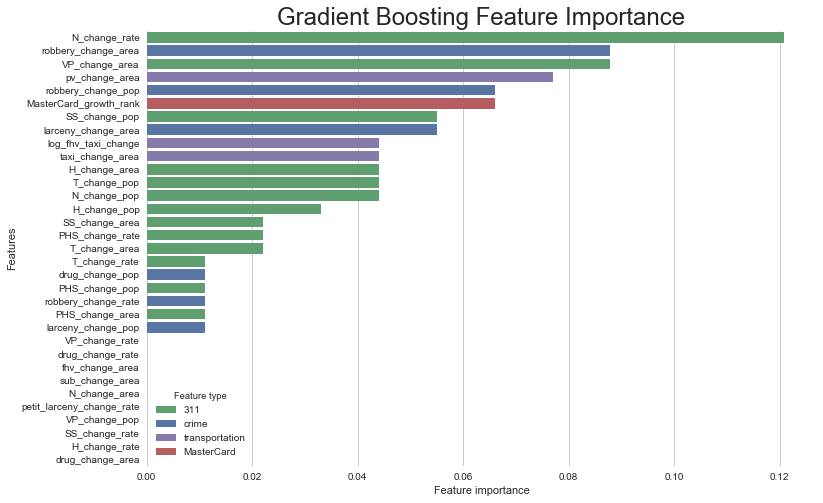

business_renewal
Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.8min finished


{'learning_rate': 0.2, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 95}
In sample accuracy: 0.791159514503112
Out of sample accuracy: 0.45638141310577685


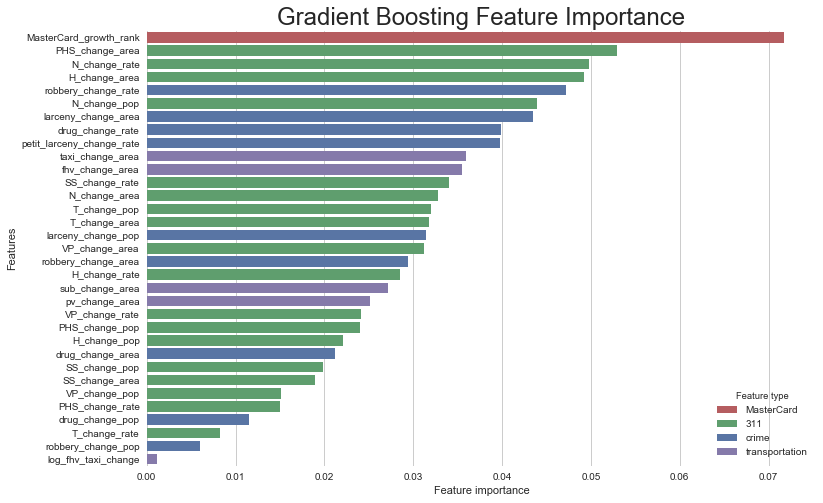

rent_increase
Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.7min finished


{'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 90}
In sample accuracy: 0.3948230667809647
Out of sample accuracy: 0.06542660804901945


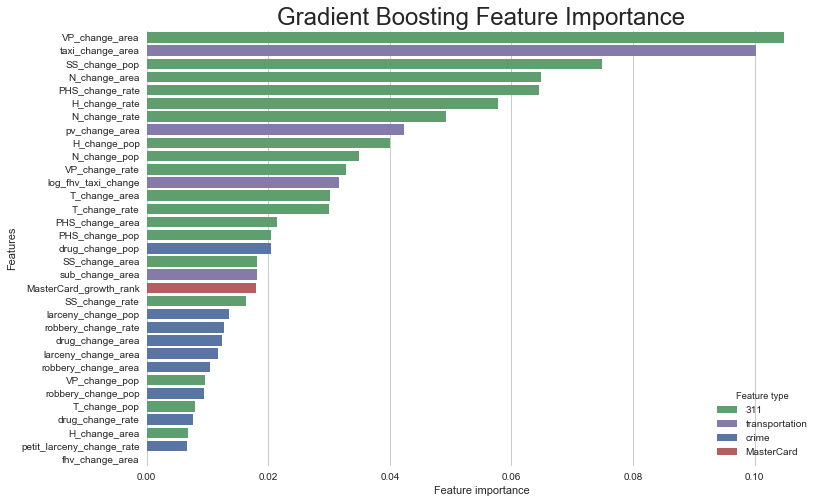

new_building_tbp
Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.7min finished


{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 99}
In sample accuracy: 0.9452920698126215
Out of sample accuracy: 0.14775079838240945


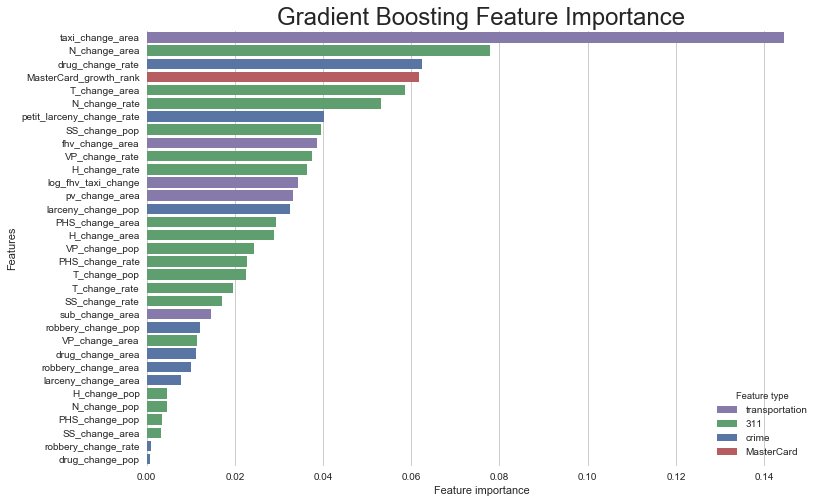

major_renovation_tbp
Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  1.7min finished


{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 109}
In sample accuracy: 0.889019016151774
Out of sample accuracy: 0.28195948587012276


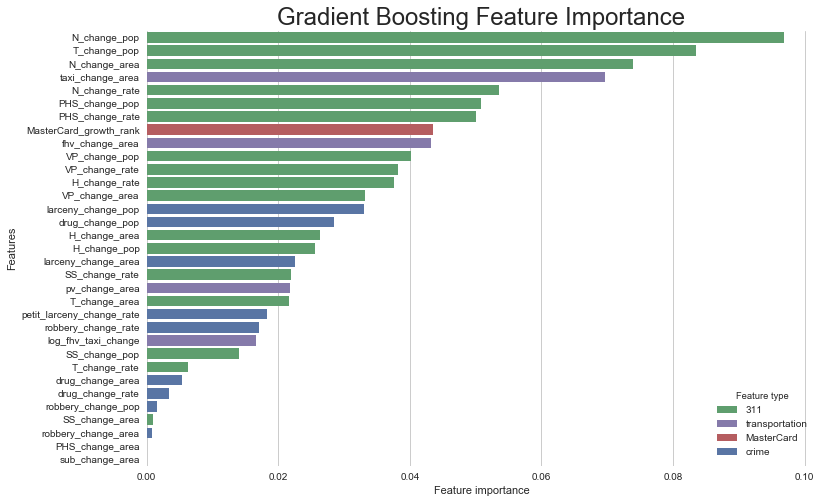

In [8]:
for i in range(5):
    print(Ygroup.columns[i])
    X_train, X_test, y_train, y_test = train_test_split(
        X, Ygroup.iloc[:,i], test_size = 0.3, random_state = 0)
    
    est = GradientBoostingRegressor(random_state=0)
    
    param_grid = {'n_estimators':range(90,110),
                  'learning_rate':np.arange(0.05,0.2,0.05),
                  'max_depth':range(1,3),
                  'loss':['ls', 'lad', 'huber', 'quantile']}
    best_param = cross_validate(est, param_grid)
    print(best_param)
    
    est = GradientBoostingRegressor(random_state=0,
                                    n_estimators=best_param['n_estimators'],
                                    learning_rate=best_param['learning_rate'],
                                    max_depth=best_param['max_depth'],
                                    loss=best_param['loss'],).fit(X_train, y_train)
    
    print ('In sample accuracy: {}'.format(est.score(X_train,y_train)))
    print ('Out of sample accuracy: {}'.format(est.score(X_test,y_test)))
     
    d = {'Features': np.asarray(X.columns), 
         'Feature importance': np.asarray(est.feature_importances_),
         'Feature type': ['crime','crime','crime','crime','crime','crime',
                     'crime','crime','crime','311','311','311','311',
                     '311','311','311','311','311','311','311','311',
                     '311','311','311','311','311','311','MasterCard',
                     'transportation','transportation','transportation',
                          'transportation','transportation']}
    df = pd.DataFrame(data=d)
    df.sort_values(by='Feature importance', ascending=False, inplace=True)
    
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(12, 8))
    sns.set_color_codes("muted")
    palette ={"crime":"C0", "311":"C1", "MasterCard":"C2", "transportation":"C3"}
    sns.barplot(x="Feature importance", y="Features", data=df, hue="Feature type", dodge=False, palette=palette)

    sns.despine(left=True, bottom=True)
    #plt.savefig('featurerank', dpi=500, transparent=False, bbox_inches='tight')
    plt.title("Gradient Boosting Feature Importance", fontsize=24)
    plt.show()
    
    print("=====================")